# **Resumo**


Devido ao alto número de devedores no município e aos diversos casos em que acordos são realizados, mas não são honrados, torna-se essencial encontrar formas de aumentar a taxa de pagamento e beneficiar os contribuintes que cumprem com suas obrigações. Com esse objetivo, este projeto visa realizar uma análise descritiva prévia e elaborar um perfil para cada contribuinte que possui débitos, classificando-os como bons, médios ou maus pagadores. Essa classificação permitirá a definição de acordos personalizados, como descontos maiores para bons pagadores ou a exigência de pagamento à vista de uma porcentagem para maus pagadores.

O cliente solicitou a utilização de modelos de ciência de dados para diferenciar os devedores, de modo que fosse possível estabelecer condições específicas para cada perfil, por conta disso o modelo utilizado sera baseado no algoritmo de classificação 'Árvore de decisão', pois ele permite visualizar as regras utilizadas na classificação. Além disso, foram solicitadas análises estatísticas, como o valor total das dívidas, a quantidade de devedores que não cumpriram acordos anteriores, entre outras métricas.

O projeto foi desenvolvido com o auxilio de um especialista na regra de negócio, garantindo alinhamento com as necessidades do cliente, além disso o projeto também foi dividido em duas etapas:

1. Análise estatística: Construção de um dashboard com as informações solicitadas.

2. Classificação dos devedores: Utilização de um algoritmo de classificação para segmentar os devedores em três grupos (bons, médios e maus pagadores).

# **Metodologia**

Os dados foram fornecidos em arquivos TXT separados e consolidados em uma única tabela, que passou por formatação e ajustes para análise exploratória e aplicação do modelo. Em seguida, foram sorteadas 200 pessoas para compor a amostra, e, com o auxílio de um especialista na regra de negócio, cada uma foi classificada manualmente.

Com essa amostra, foram treinados e validados três algoritmos diferentes, testando diversos parâmetros. Embora o objetivo inicial fosse utilizar uma árvore de decisão, outros dois classificadores foram avaliados para comparação. Após analisar os resultados, o modelo foi aplicado a toda a base de dados.

Por fim, os resultados foram organizados em uma tabela com a classificação de cada pessoa e apresentados em um dashboard no Power BI.

![Descrição da imagem](fluxo.png)

# **Inicio do cógigo**

Importando a biblioteca utilizada

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import seaborn as sns

A base de dados foi fornecida em formato de várias tabelas em arquivos .txt. Para a divulgação deste portfólio, algumas informações sensíveis foram excluídas ou codificadas, a fim de preservar a privacidade dos contribuintes.

In [51]:
dados = pd.read_excel('novodevedores.xlsx')

In [52]:
dados

,unicodigo,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,Situação,exercicioaberto,Dividaexercicio,%pago/aberto,%quant.parcelado
0,1.0,1.086714e+07,162378.73,488232.49,153.0,5174108.01,2.415377e+07,29.0,2.371430e+07,Cancelado,4783819.24,390288.77,21.421534,18.954248
1,2.0,NaN,NaN,NaN,NaN,NaN,1.719990e+03,NaN,1.719990e+03,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,1.454130e+03,NaN,1.454130e+03,NaN,NaN,NaN,NaN,NaN
3,4.0,8.992150e+03,3449.38,20401.20,3.0,6448.75,4.195685e+04,NaN,3.299939e+04,Em Andamento,3940.08,2508.67,15.369959,NaN
4,5.0,5.643570e+03,3659.04,5974.74,3.0,7973.63,2.998170e+03,1.0,1.085580e+03,NaN,1077.93,6895.70,265.949896,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257042,257043.0,NaN,NaN,NaN,NaN,358.81,6.100000e+03,NaN,6.100000e+03,NaN,358.81,0.00,5.882131,NaN
257043,257044.0,NaN,NaN,NaN,NaN,290.85,3.127100e+02,NaN,3.127100e+02,NaN,290.85,0.00,93.009498,NaN
257044,257045.0,NaN,NaN,NaN,NaN,0.00,1.400000e+02,NaN,1.400000e+02,NaN,0.00,0.00,0.000000,NaN
257045,257046.0,NaN,NaN,NaN,NaN,0.00,5.000000e+01,NaN,5.000000e+01,NaN,0.00,0.00,0.000000,NaN


In [53]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257047 entries, 0 to 257046
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   unicodigo         257046 non-null  float64
 1   inscritoDA        154185 non-null  float64
 2   parcelado         86044 non-null   float64
 3   parceladopago     84251 non-null   float64
 4   quant             86044 non-null   float64
 5   aberto            172223 non-null  float64
 6   pago              236003 non-null  float64
 7   qparceladopago    21584 non-null   float64
 8   exerciciopago     223046 non-null  float64
 9   Situação          24490 non-null   object 
 10  exercicioaberto   159153 non-null  float64
 11  Dividaexercicio   158560 non-null  float64
 12  %pago/aberto      154470 non-null  float64
 13  %quant.parcelado  21584 non-null   float64
dtypes: float64(13), object(1)
memory usage: 27.5+ MB


In [54]:
dados.shape

(257047, 14)

In [55]:
dados.describe()

,unicodigo,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,exercicioaberto,Dividaexercicio,%pago/aberto,%quant.parcelado
count,257046.000000,1.541850e+05,8.604400e+04,8.425100e+04,86044.000000,1.722230e+05,2.360030e+05,21584.000000,2.230460e+05,1.591530e+05,1.585600e+05,1.544700e+05,21584.000000
mean,128523.500000,2.159528e+05,5.432745e+03,4.128270e+04,5.256590,5.636754e+03,1.745775e+05,2.150760,3.583131e+04,3.290084e+03,2.595768e+03,inf,32.339785
std,74202.932984,8.516680e+06,3.659454e+04,3.278845e+05,39.275595,4.891077e+05,7.816326e+06,8.590186,3.631728e+06,5.022081e+05,7.357342e+04,NaN,24.917789
min,1.000000,0.000000e+00,2.800000e-01,2.800000e-01,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-9.296984e+05,0.000000e+00,1.020408
25%,64262.250000,2.901300e+02,5.390475e+02,1.102420e+03,1.000000,4.122000e+01,1.774100e+02,1.000000,1.789925e+02,0.000000e+00,0.000000e+00,1.348392e+00,14.285714
50%,128523.500000,1.355990e+03,1.675780e+03,6.901380e+03,3.000000,4.942400e+02,3.060630e+03,1.000000,2.124485e+03,2.908500e+02,0.000000e+00,7.744443e+00,25.000000
75%,192784.750000,4.806480e+03,4.243110e+03,2.708910e+04,6.000000,1.918895e+03,1.216168e+04,2.000000,8.513139e+03,9.116200e+02,6.323175e+02,3.764967e+01,44.444444
max,257046.000000,1.564166e+09,3.754389e+06,4.206172e+07,5952.000000,2.000001e+08,1.564166e+09,662.000000,1.478467e+09,2.000000e+08,1.920864e+07,inf,100.000000


In [56]:
correlation_matrix = dados.corr(method='pearson')

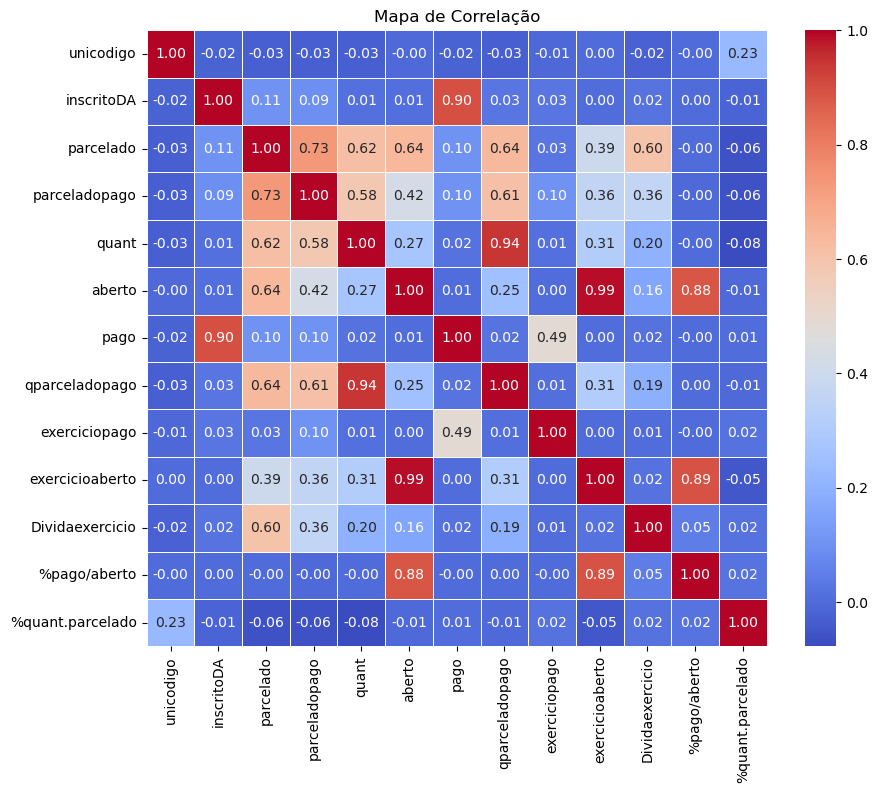

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

Gerou-se a matriz de correlação para todas as variáveis, exceto a variável "situação", por ser uma variável qualitativa. Com isso, identificamos uma correlação de 0,99 entre as variáveis "aberto" e "dividaexercicio", além de outras duas correlações acima de 0,9.

No entanto, como o algoritmo a ser aplicado é a Árvore de Decisão, que permite o uso de variáveis com alta correlação, optamos por remover apenas as variáveis "dividaexercicio" e "situação" para a aplicação do modelo. A remoção de "dividaexercicio" foi feita para evitar redundância, enquanto a variável "situação" foi excluída por ser qualitativa e não adequada para o modelo.

Para a análise descritiva e a construção do dashboard com as informações solicitadas, utilizamos todas as variáveis disponíveis. Além disso, elaboramos uma apresentação interativa no Power BI para demonstrar as análises estatísticas de forma clara e visual.

Analise do dashbord

![Dashboard de parcelamento](dash_parcelamento.png)

O objetivo deste dashboard é evidenciar a baixa taxa de pagamento dos parcelamentos, destacando que eles representam um volume significativo (452 mil). Além disso, ele apresenta, em valores, o montante potencial para novos parcelamentos, considerando que valores em aberto de exercícios não são elegíveis para essa modalidade.

Outro ponto relevante é a grande quantidade de parcelamentos sem nenhum pagamento, totalizando um pouco mais de 64 mil. Além da análise dos casos com pagamento zero, o dashboard também inclui um gráfico que mostra a distribuição dos parcelamentos de acordo com diferentes taxas de adimplência.

![Descrição da imagem](dash_contribuinte.png)

Para finalizar a análise exploratória elaboramos um dashboard por contribuinte, sendo que este fornece uma visão geral por pessoa, apresentando rankings de devedores e pagadores. Ao selecionar um indivíduo específico, é possível acessar informações detalhadas sobre o mesmo. Além disso, no caso dos devedores, é possível identificar facilmente aqueles que possuem valores significativamente mais altos do que os demais.

# **Aplicação do modelo**

Na sequência, os dados serão preparados para a aplicação do modelo. Para isso, serão realizadas as seguintes etapas:

Remoção das variáveis citadas anteriormente: As variáveis "dividaexercicio" e "situação" serão excluídas, conforme explicado.

Tratamento de valores nulos: Os valores NaN serão substituídos por 0, garantindo que não haja dados faltantes que possam interferir no modelo.

Amostragem: Será utilizada uma amostra de 200 devedores, previamente classificada por um especialista em três categorias: bom, médio e mau pagador. Essa amostra servirá como base para o treinamento e validação do modelo.

In [58]:
dados = dados.fillna(0)

In [59]:
dados = dados.drop(['Situação', 'Dividaexercicio'], axis = 1)
dados.replace([np.inf, -np.inf], 99999999999999, inplace=True)

In [60]:
amostra = pd.read_excel('amostra_portifolio.xlsx')

In [61]:
amostra['resposta'] = amostra['resposta'].replace('R', 1)
amostra['resposta'] = amostra['resposta'].replace('M', 2)
amostra['resposta'] = amostra['resposta'].replace('B', 3)
amostra

,unicodigo,resposta
0,34801.0,1
1,114098.0,3
2,120981.0,2
3,205945.0,2
4,74362.0,3
...,...,...
195,45012.0,1
196,60718.0,3
197,12665.0,1
198,109517.0,2


In [62]:
train = pd.merge(amostra, dados, on='unicodigo', how='inner')

In [63]:
correlation_matrix = train.corr(method='pearson')

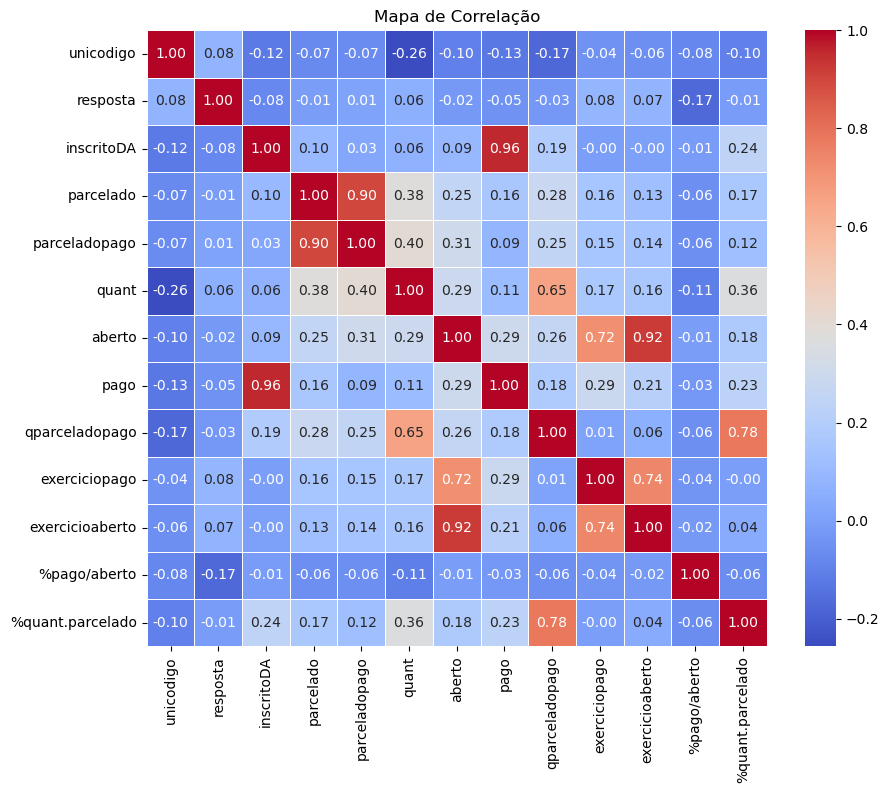

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

Vericou-se que não existe correlação alta entra a variavel resposta e outra variavel do modelo.

In [65]:
x = train.iloc[:, 2:13].values
y = train['resposta'].values

In [111]:
df_temp = pd.DataFrame(train,columns=train.columns[2:13])
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,train['resposta'],test_size=0.5,stratify=train['resposta'])
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

Embora tenha sido decidido, inicialmente, utilizar o classificador Árvore de Decisão (devido à sua interpretabilidade e capacidade de fornecer regras claras), resolvemos realizar testes adicionais com outros algoritmos, como KNN (K-Nearest Neighbors) e Random Forest, para verificar se haveria perdas significativas ao optar pelo método que nos permite entender as regras utilizadas.

Essa abordagem nos permitiu comparar o desempenho dos modelos e avaliar se a escolha da Árvore de Decisão seria a mais adequada para o problema em questão, considerando tanto a acurácia quanto a interpretabilidade.

Para realizar os testes de cada modelo, primeiramente foram analisadas as melhores configurações (hiperparâmetros) para cada um. Em seguida, foi realizada a comparação de 10 repetições de cada modelo em sua melhor parametrização, garantindo que os resultados fossem robustos e confiáveis.

# KNN

In [109]:
for i in range(1,51):
  for j in ["uniform","distance"]:
    KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
    KNN.fit(x_treino,y_treino)
    opiniao = KNN.predict(x_validacao)
    pred = KNN.predict(x_validacao)
    print("Acc: ",accuracy_score(y_validacao, opiniao), 'n vizinhos: ', i, 'distancia: ', j)

Acc:  0.6 n vizinhos:  1 distancia:  uniform
Acc:  0.6 n vizinhos:  1 distancia:  distance
Acc:  0.5 n vizinhos:  2 distancia:  uniform
Acc:  0.6 n vizinhos:  2 distancia:  distance
Acc:  0.52 n vizinhos:  3 distancia:  uniform
Acc:  0.58 n vizinhos:  3 distancia:  distance
Acc:  0.54 n vizinhos:  4 distancia:  uniform
Acc:  0.56 n vizinhos:  4 distancia:  distance
Acc:  0.56 n vizinhos:  5 distancia:  uniform
Acc:  0.6 n vizinhos:  5 distancia:  distance
Acc:  0.64 n vizinhos:  6 distancia:  uniform
Acc:  0.66 n vizinhos:  6 distancia:  distance
Acc:  0.64 n vizinhos:  7 distancia:  uniform
Acc:  0.62 n vizinhos:  7 distancia:  distance
Acc:  0.64 n vizinhos:  8 distancia:  uniform
Acc:  0.64 n vizinhos:  8 distancia:  distance
Acc:  0.6 n vizinhos:  9 distancia:  uniform
Acc:  0.62 n vizinhos:  9 distancia:  distance
Acc:  0.6 n vizinhos:  10 distancia:  uniform
Acc:  0.64 n vizinhos:  10 distancia:  distance
Acc:  0.56 n vizinhos:  11 distancia:  uniform
Acc:  0.58 n vizinhos:  11 d

Para o knn a melhor parametrização entre as analisadas foi de 4 vizinhos e usando distancia uniforme

In [95]:
KNN = KNeighborsClassifier(n_neighbors=4,weights='uniform')
KNN.fit(x_treino,y_treino)
opiniao = KNN.predict(x_teste)
print("Acc: ",accuracy_score(y_teste, opiniao))

Acc:  0.58


In [96]:
y_score = KNN.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC KNN: ",metrics.auc(fpr,tpr))

AUC KNN:  0.6798245614035088


In [97]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.83      0.75      0.79        20
           2       0.38      0.50      0.43        12
           3       0.50      0.44      0.47        18

    accuracy                           0.58        50
   macro avg       0.57      0.56      0.56        50
weighted avg       0.60      0.58      0.59        50



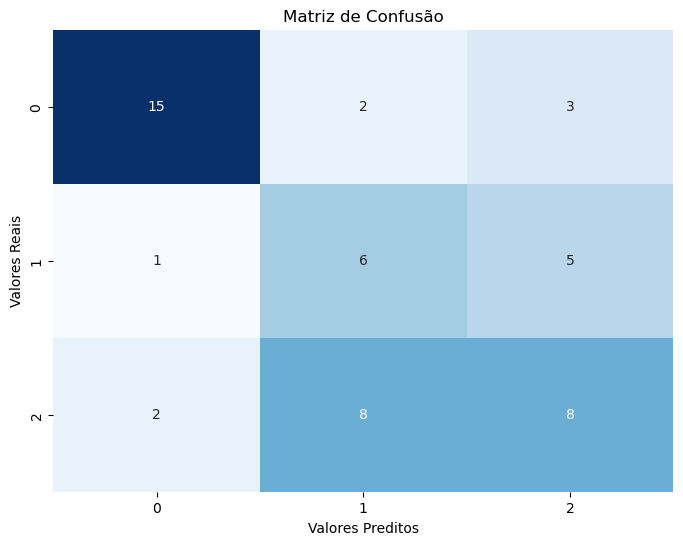

In [98]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

# Arvore de decisão 

In [114]:
from sklearn import tree ## quando mais for, mais aumenta a saida, pq é combinatoria
for cri in ['gini', 'entropy']:
  for md in range(5,11):
    for nms in range(3,8):
      DT = tree.DecisionTreeClassifier(criterion=cri, max_depth=md, min_samples_split=nms) ## max_depth é a profundidade max da arvore (poda) e criteiron o criterio de avaliacao
      DT.fit(x_treino,y_treino) ## treinando o classificador
      opiniao = DT.predict(x_validacao) ## colhendo a opiniao do classificador
      print("criterion: ", cri, "Acc: ",accuracy_score(y_validacao, opiniao), 'md', md,'nms', nms) # calc a acuracia

criterion:  gini Acc:  0.54 md 5 nms 3
criterion:  gini Acc:  0.54 md 5 nms 4
criterion:  gini Acc:  0.54 md 5 nms 5
criterion:  gini Acc:  0.54 md 5 nms 6
criterion:  gini Acc:  0.52 md 5 nms 7
criterion:  gini Acc:  0.48 md 6 nms 3
criterion:  gini Acc:  0.52 md 6 nms 4
criterion:  gini Acc:  0.52 md 6 nms 5
criterion:  gini Acc:  0.48 md 6 nms 6
criterion:  gini Acc:  0.5 md 6 nms 7
criterion:  gini Acc:  0.48 md 7 nms 3
criterion:  gini Acc:  0.5 md 7 nms 4
criterion:  gini Acc:  0.52 md 7 nms 5
criterion:  gini Acc:  0.52 md 7 nms 6
criterion:  gini Acc:  0.5 md 7 nms 7
criterion:  gini Acc:  0.52 md 8 nms 3
criterion:  gini Acc:  0.52 md 8 nms 4
criterion:  gini Acc:  0.52 md 8 nms 5
criterion:  gini Acc:  0.52 md 8 nms 6
criterion:  gini Acc:  0.5 md 8 nms 7
criterion:  gini Acc:  0.46 md 9 nms 3
criterion:  gini Acc:  0.44 md 9 nms 4
criterion:  gini Acc:  0.48 md 9 nms 5
criterion:  gini Acc:  0.5 md 9 nms 6
criterion:  gini Acc:  0.5 md 9 nms 7
criterion:  gini Acc:  0.5 md 1

Para arvore de decisão a melhor parametrização é 8 para md e 4 para mns.

In [133]:
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=4) ## max_depth é a profundidade max da arvore (poda) e criteiron o criterio de avaliacao
DT.fit(x_treino,y_treino) ## treinando o classificador
opiniao = DT.predict(x_teste) ## colhendo a opiniao do classificador
print("criterion: ", cri, "Acc: ",accuracy_score(y_teste, opiniao)) # calc a acuracia

criterion:  entropy Acc:  0.7


In [134]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_treino,y_treino)
y_score = DT.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))

AUC DT:  0.6842105263157896


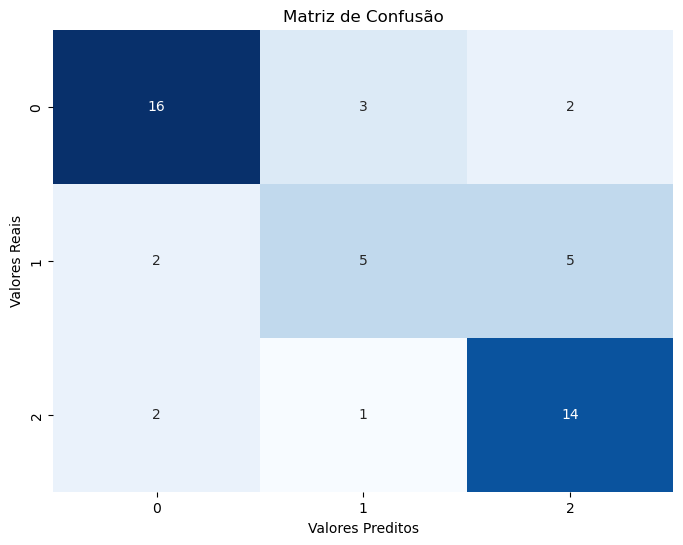

In [135]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [136]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78        21
           2       0.56      0.42      0.48        12
           3       0.67      0.82      0.74        17

    accuracy                           0.70        50
   macro avg       0.67      0.67      0.66        50
weighted avg       0.70      0.70      0.69        50



In [137]:
feature_importances = DT.feature_importances_
features = x_treino.columns if isinstance(x_treino, pd.DataFrame) else range(len(feature_importances))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(importances_df)

Importância das Features:
             Feature  Importance
7      exerciciopago    0.300569
9       %pago/aberto    0.226871
8    exercicioaberto    0.145925
4             aberto    0.116378
5               pago    0.075325
0         inscritoDA    0.064490
10  %quant.parcelado    0.049706
1          parcelado    0.020735
2      parceladopago    0.000000
3              quant    0.000000
6     qparceladopago    0.000000


In [138]:
from sklearn.tree import export_text

tree_rules = export_text(DT, feature_names=list(features))
print(tree_rules)

|--- exerciciopago <= 833.96
|   |--- %quant.parcelado <= 29.17
|   |   |--- inscritoDA <= 594.31
|   |   |   |--- %pago/aberto <= 1901.70
|   |   |   |   |--- inscritoDA <= 415.47
|   |   |   |   |   |--- aberto <= 101.21
|   |   |   |   |   |   |--- %pago/aberto <= 34.10
|   |   |   |   |   |   |   |--- exercicioaberto <= 25.00
|   |   |   |   |   |   |   |   |--- parcelado <= 33.29
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- parcelado >  33.29
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- exercicioaberto >  25.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- %pago/aberto >  34.10
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- aberto >  101.21
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- inscritoDA >  415.47
|   |   |   |   |   |--- class: 3
|   |   |   |--- %pago/aberto >  1901.70
|   |   |   |   |--- class: 2
|   |   |--- inscritoDA >  594.3

# Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
for cri in ['gini', 'entropy']:
  for md in range(5,11):
    for nms in range(3,8):
      for ne in (50, 100, 150, 200):
        RF = RandomForestClassifier(criterion = cri, n_estimators=ne, max_depth=md,min_samples_split=nms)
        RF.fit(x_treino,y_treino)
        opiniao = RF.predict(x_validacao)
        print("criterion: ", cri, "Acc: ",accuracy_score(y_validacao, opiniao), 'md', md,'nms', nms, 'ne', ne) # calc a acuracia
        # plot_roc_curve(fpr, tpr,"yellow","RF")

criterion:  gini Acc:  0.58 md 5 nms 3 ne 50
criterion:  gini Acc:  0.56 md 5 nms 3 ne 100
criterion:  gini Acc:  0.54 md 5 nms 3 ne 150
criterion:  gini Acc:  0.56 md 5 nms 3 ne 200
criterion:  gini Acc:  0.5 md 5 nms 4 ne 50
criterion:  gini Acc:  0.56 md 5 nms 4 ne 100
criterion:  gini Acc:  0.56 md 5 nms 4 ne 150
criterion:  gini Acc:  0.58 md 5 nms 4 ne 200
criterion:  gini Acc:  0.54 md 5 nms 5 ne 50
criterion:  gini Acc:  0.56 md 5 nms 5 ne 100
criterion:  gini Acc:  0.56 md 5 nms 5 ne 150
criterion:  gini Acc:  0.58 md 5 nms 5 ne 200
criterion:  gini Acc:  0.54 md 5 nms 6 ne 50
criterion:  gini Acc:  0.56 md 5 nms 6 ne 100
criterion:  gini Acc:  0.52 md 5 nms 6 ne 150
criterion:  gini Acc:  0.54 md 5 nms 6 ne 200
criterion:  gini Acc:  0.52 md 5 nms 7 ne 50
criterion:  gini Acc:  0.52 md 5 nms 7 ne 100
criterion:  gini Acc:  0.56 md 5 nms 7 ne 150
criterion:  gini Acc:  0.52 md 5 nms 7 ne 200
criterion:  gini Acc:  0.54 md 6 nms 3 ne 50
criterion:  gini Acc:  0.54 md 6 nms 3 ne

criterion:  entropy Acc:  0.56 md 7 nms 7 ne 100
criterion:  entropy Acc:  0.54 md 7 nms 7 ne 150
criterion:  entropy Acc:  0.54 md 7 nms 7 ne 200
criterion:  entropy Acc:  0.58 md 8 nms 3 ne 50
criterion:  entropy Acc:  0.56 md 8 nms 3 ne 100
criterion:  entropy Acc:  0.56 md 8 nms 3 ne 150
criterion:  entropy Acc:  0.6 md 8 nms 3 ne 200
criterion:  entropy Acc:  0.62 md 8 nms 4 ne 50
criterion:  entropy Acc:  0.6 md 8 nms 4 ne 100
criterion:  entropy Acc:  0.56 md 8 nms 4 ne 150
criterion:  entropy Acc:  0.58 md 8 nms 4 ne 200
criterion:  entropy Acc:  0.56 md 8 nms 5 ne 50
criterion:  entropy Acc:  0.62 md 8 nms 5 ne 100
criterion:  entropy Acc:  0.5 md 8 nms 5 ne 150
criterion:  entropy Acc:  0.56 md 8 nms 5 ne 200
criterion:  entropy Acc:  0.64 md 8 nms 6 ne 50
criterion:  entropy Acc:  0.56 md 8 nms 6 ne 100
criterion:  entropy Acc:  0.54 md 8 nms 6 ne 150
criterion:  entropy Acc:  0.62 md 8 nms 6 ne 200
criterion:  entropy Acc:  0.56 md 8 nms 7 ne 50
criterion:  entropy Acc:  0.

Pra random forest a maior acuracia foi obtida com md = 9, nms = 4 e ne = 50

In [160]:
inicio = time.time()
RF = RandomForestClassifier(criterion = 'gini', n_estimators=50, max_depth=8,min_samples_split=7)
RF.fit(x_treino,y_treino)
opiniao = RF.predict(x_teste)
print("criterion: ", cri, "Acc: ",accuracy_score(y_teste, opiniao)) # calc a acuracia

fim = time.time()
print(fim - inicio)

criterion:  entropy Acc:  0.72
0.10676288604736328


In [161]:
y_score = RF.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC RF: ",metrics.auc(fpr,tpr))

AUC RF:  0.7741228070175439


In [162]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.79      0.90      0.84        21
           2       0.67      0.33      0.44        12
           3       0.65      0.76      0.70        17

    accuracy                           0.72        50
   macro avg       0.70      0.67      0.66        50
weighted avg       0.71      0.72      0.70        50



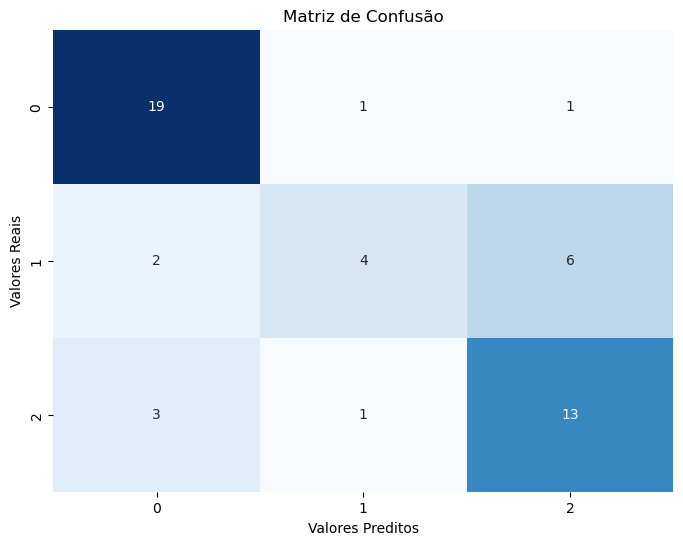

In [163]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [164]:
# Importância das Features
feature_importances = RF.feature_importances_
features = x_treino.columns if isinstance(x_treino, pd.DataFrame) else range(len(feature_importances))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(importances_df)

Importância das Features:
             Feature  Importance
7      exerciciopago    0.188979
9       %pago/aberto    0.160959
5               pago    0.160050
0         inscritoDA    0.127894
4             aberto    0.098506
8    exercicioaberto    0.083703
3              quant    0.055851
1          parcelado    0.045622
2      parceladopago    0.036713
10  %quant.parcelado    0.027082
6     qparceladopago    0.014641


Avaliação do melhor metodo

Buscando uma melhor veracidade cada um dos classificadores foram geradas 10 vezes e foi utilizado esses 10 valores de acuracia e de AUC

acuracia

In [165]:
KNN = [0.56,0.44,0.5,0.54,0.54,0.56,0.6,0.52,0.5,0.58]
RF = [6.64,0.72,0.72,0.7,0.7,0.68,0.68,0.7,0.72,0.72]
AD = [0.7,0.66,0.72,0.72,0.72,0.7,0.72,0.68,0.7,0,64,0.7]

from scipy import stats
print(stats.kruskal(KNN, RF, AD))

KruskalResult(statistic=17.271984680102975, pvalue=0.00017759722721584305)


In [167]:
from scipy.stats import mannwhitneyu
p = mannwhitneyu(KNN, RF, method="exact",alternative="two-sided")
print("KNN vs RF: ",p)
p = mannwhitneyu(KNN, AD, method="exact",alternative="two-sided")
print("KNN vs AD: ",p)
p = mannwhitneyu(AD, RF, method="exact",alternative="two-sided")
print("AD vs RF: ",p)

KNN vs RF:  MannwhitneyuResult(statistic=0.0, pvalue=1.082508822446903e-05)
KNN vs AD:  MannwhitneyuResult(statistic=10.0, pvalue=0.0004299106466289129)
AD vs RF:  MannwhitneyuResult(statistic=53.0, pvalue=0.674396810619721)


In [ ]:
AUC

In [168]:
KNN = [0.55,0.52,0.61,0.66,0.63,0.68,0.68,0.5,0.4,0.7]
RF = [0.71,0.72,0.74,0.79,0.75,0.78,0.75,0.73,0.77,0.77]
AD = [0.63,0.66,0.74,0.66,0.64,0.66,0.64,0.73,0.62,0.68]

from scipy import stats
print(stats.kruskal(KNN, RF, AD))

KruskalResult(statistic=18.549631284916217, pvalue=9.3755929936501e-05)


In [169]:

p = mannwhitneyu(KNN, RF, method="exact",alternative="two-sided")
print("KNN vs RF: ",p)
p = mannwhitneyu(KNN, AD, method="exact",alternative="two-sided")
print("KNN vs AD: ",p)
p = mannwhitneyu(AD, RF, method="exact",alternative="two-sided")
print("AD vs RF: ",p)

KNN vs RF:  MannwhitneyuResult(statistic=0.0, pvalue=1.082508822446903e-05)
KNN vs AD:  MannwhitneyuResult(statistic=30.0, pvalue=0.143140141592154)
AD vs RF:  MannwhitneyuResult(statistic=6.0, pvalue=0.00032475264673407085)


# Comparando os classificadores

Em termos de acurácia:

Não há diferença estatisticamente significativa entre o uso da Árvore de Decisão e do Random Forest.

No entanto, ao comparar esses dois modelos com o KNN, há uma diferença significativa, sendo que a Árvore de Decisão apresenta resultados ligeiramente melhores.

Em termos de AUC:

Não há diferença significativa entre a Árvore de Decisão e o KNN.

Já entre a Árvore de Decisão e o Random Forest, há uma diferença significativa, com o Random Forest apresentando um desempenho superior.

Esse resultado era esperado, uma vez que o Random Forest é uma evolução da Árvore de Decisão, combinando múltiplas árvores para melhorar a precisão e a robustez. No entanto, uma desvantagem do Random Forest é a falta de interpretabilidade, já que não é possível visualizar as regras utilizadas pelo modelo.

Considerando que a diferença estatística no AUC é significativa apenas entre a Árvore de Decisão e o Random Forest, e que a Árvore de Decisão oferece a vantagem de ser interpretável, definimos que o modelo final a ser utilizado será a Árvore de Decisão, com os parâmetros max_depth (md) igual a 8 e min_samples_split (nmd) definido como 4.

In [172]:
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=4) ## max_depth é a profundidade max da arvore (poda) e criteiron o criterio de avaliacao
DT.fit(x_treino,y_treino) ## treinando o classificador
opiniao = DT.predict(x_teste) ## colhendo a opiniao do classificador
print("criterion: ", cri, "Acc: ",accuracy_score(y_teste, opiniao)) # calc a acuracia

criterion:  entropy Acc:  0.7


In [173]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_treino,y_treino)
y_score = DT.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))

AUC DT:  0.6557017543859649


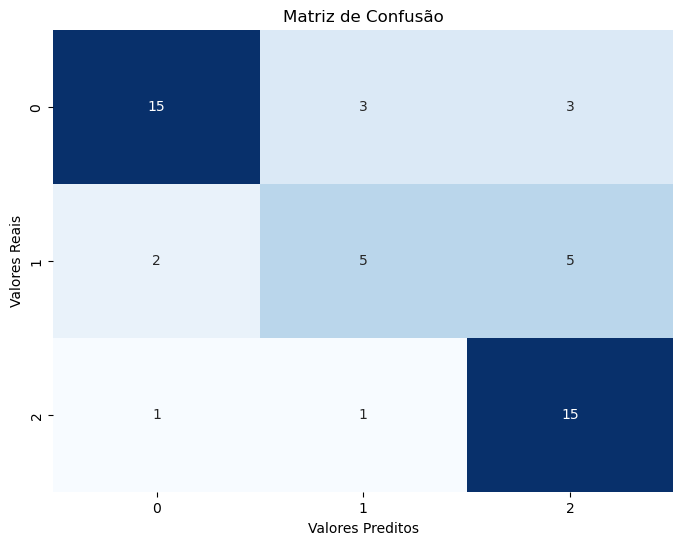

In [174]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [175]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.56      0.42      0.48        12
           3       0.65      0.88      0.75        17

    accuracy                           0.70        50
   macro avg       0.68      0.67      0.67        50
weighted avg       0.71      0.70      0.69        50



In [176]:
feature_importances = DT.feature_importances_
features = x_treino.columns if isinstance(x_treino, pd.DataFrame) else range(len(feature_importances))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(importances_df)

Importância das Features:
             Feature  Importance
7      exerciciopago    0.300569
9       %pago/aberto    0.229648
4             aberto    0.116378
8    exercicioaberto    0.114266
0         inscritoDA    0.085225
10  %quant.parcelado    0.078587
5               pago    0.075325
1          parcelado    0.000000
2      parceladopago    0.000000
3              quant    0.000000
6     qparceladopago    0.000000


In [177]:
from sklearn.tree import export_text

tree_rules = export_text(DT, feature_names=list(features))
print(tree_rules)

|--- exerciciopago <= 833.96
|   |--- %quant.parcelado <= 29.17
|   |   |--- inscritoDA <= 594.31
|   |   |   |--- %pago/aberto <= 1901.70
|   |   |   |   |--- inscritoDA <= 415.47
|   |   |   |   |   |--- aberto <= 101.21
|   |   |   |   |   |   |--- %pago/aberto <= 34.10
|   |   |   |   |   |   |   |--- exercicioaberto <= 25.00
|   |   |   |   |   |   |   |   |--- inscritoDA <= 199.51
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- inscritoDA >  199.51
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- exercicioaberto >  25.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- %pago/aberto >  34.10
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- aberto >  101.21
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- inscritoDA >  415.47
|   |   |   |   |   |--- class: 3
|   |   |   |--- %pago/aberto >  1901.70
|   |   |   |   |--- class: 2
|   |   |--- inscritoDA >  5

Aplicando o modelo

In [178]:
dados

,unicodigo,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,exercicioaberto,%pago/aberto,%quant.parcelado
0,1.0,1.086714e+07,162378.73,488232.49,153.0,5174108.01,2.415377e+07,29.0,2.371430e+07,4783819.24,21.421534,18.954248
1,2.0,0.000000e+00,0.00,0.00,0.0,0.00,1.719990e+03,0.0,1.719990e+03,0.00,0.000000,0.000000
2,3.0,0.000000e+00,0.00,0.00,0.0,0.00,1.454130e+03,0.0,1.454130e+03,0.00,0.000000,0.000000
3,4.0,8.992150e+03,3449.38,20401.20,3.0,6448.75,4.195685e+04,0.0,3.299939e+04,3940.08,15.369959,0.000000
4,5.0,5.643570e+03,3659.04,5974.74,3.0,7973.63,2.998170e+03,1.0,1.085580e+03,1077.93,265.949896,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
257042,257043.0,0.000000e+00,0.00,0.00,0.0,358.81,6.100000e+03,0.0,6.100000e+03,358.81,5.882131,0.000000
257043,257044.0,0.000000e+00,0.00,0.00,0.0,290.85,3.127100e+02,0.0,3.127100e+02,290.85,93.009498,0.000000
257044,257045.0,0.000000e+00,0.00,0.00,0.0,0.00,1.400000e+02,0.0,1.400000e+02,0.00,0.000000,0.000000
257045,257046.0,0.000000e+00,0.00,0.00,0.0,0.00,5.000000e+01,0.0,5.000000e+01,0.00,0.000000,0.000000


In [179]:
previsoes = DT.predict(dados.iloc[:, 1:12])

In [180]:
dados['Previsao'] = previsoes

In [181]:
dados

,unicodigo,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,exercicioaberto,%pago/aberto,%quant.parcelado,Previsao
0,1.0,1.086714e+07,162378.73,488232.49,153.0,5174108.01,2.415377e+07,29.0,2.371430e+07,4783819.24,21.421534,18.954248,1
1,2.0,0.000000e+00,0.00,0.00,0.0,0.00,1.719990e+03,0.0,1.719990e+03,0.00,0.000000,0.000000,2
2,3.0,0.000000e+00,0.00,0.00,0.0,0.00,1.454130e+03,0.0,1.454130e+03,0.00,0.000000,0.000000,2
3,4.0,8.992150e+03,3449.38,20401.20,3.0,6448.75,4.195685e+04,0.0,3.299939e+04,3940.08,15.369959,0.000000,1
4,5.0,5.643570e+03,3659.04,5974.74,3.0,7973.63,2.998170e+03,1.0,1.085580e+03,1077.93,265.949896,33.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257042,257043.0,0.000000e+00,0.00,0.00,0.0,358.81,6.100000e+03,0.0,6.100000e+03,358.81,5.882131,0.000000,2
257043,257044.0,0.000000e+00,0.00,0.00,0.0,290.85,3.127100e+02,0.0,3.127100e+02,290.85,93.009498,0.000000,1
257044,257045.0,0.000000e+00,0.00,0.00,0.0,0.00,1.400000e+02,0.0,1.400000e+02,0.00,0.000000,0.000000,3
257045,257046.0,0.000000e+00,0.00,0.00,0.0,0.00,5.000000e+01,0.0,5.000000e+01,0.00,0.000000,0.000000,3


In [182]:
dados.to_excel('dados_com_previsoes1.xlsx', index=False)

# visualização - interpretação

O modelo apresentou uma acurácia de 0,7 e um AUC de 0,66, indicando um desempenho moderado na classificação dos perfis de devedores. A análise da matriz de confusão revelou que a maior dificuldade do modelo está em classificar corretamente os pagadores medianos, sugerindo que essa categoria pode ter características menos distintas em relação aos bons e maus pagadores.

Variáveis mais significativas:
As variáveis que mais contribuíram para o modelo foram:

%aberto/pago: Indica a porcentagem de valores em aberto em relação aos valores já pagos.

exerciciopago: Representa o valor pago no ano da dívida.

exercicioaberto: Reflete o valor de lançamentos realizado no ano que ainda está em aberto.

aberto: Indica o valor total em aberto.

Essas variáveis demonstraram ser as mais relevantes para a classificação dos devedores, destacando-se como indicadores-chave para a distinção entre os perfis.

Árvore de Decisão:
A ilustração da árvore de decisão gerada pelo modelo permite visualizar as regras de classificação utilizadas em cada divisão. Essa transparência é uma vantagem significativa, pois possibilita a replicação das regras em novos casos e facilita a interpretação dos resultados por parte dos gestores.

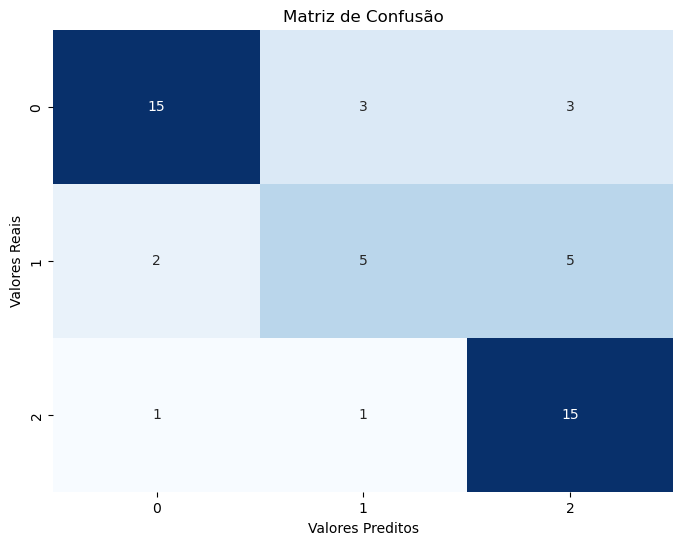

In [183]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [184]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.56      0.42      0.48        12
           3       0.65      0.88      0.75        17

    accuracy                           0.70        50
   macro avg       0.68      0.67      0.67        50
weighted avg       0.71      0.70      0.69        50



In [185]:
feature_importances = DT.feature_importances_
features = x_treino.columns if isinstance(x_treino, pd.DataFrame) else range(len(feature_importances))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(importances_df)

Importância das Features:
             Feature  Importance
7      exerciciopago    0.300569
9       %pago/aberto    0.229648
4             aberto    0.116378
8    exercicioaberto    0.114266
0         inscritoDA    0.085225
10  %quant.parcelado    0.078587
5               pago    0.075325
1          parcelado    0.000000
2      parceladopago    0.000000
3              quant    0.000000
6     qparceladopago    0.000000


In [186]:
from sklearn.tree import export_text

tree_rules = export_text(DT, feature_names=list(features))
print(tree_rules)

|--- exerciciopago <= 833.96
|   |--- %quant.parcelado <= 29.17
|   |   |--- inscritoDA <= 594.31
|   |   |   |--- %pago/aberto <= 1901.70
|   |   |   |   |--- inscritoDA <= 415.47
|   |   |   |   |   |--- aberto <= 101.21
|   |   |   |   |   |   |--- %pago/aberto <= 34.10
|   |   |   |   |   |   |   |--- exercicioaberto <= 25.00
|   |   |   |   |   |   |   |   |--- inscritoDA <= 199.51
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- inscritoDA >  199.51
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- exercicioaberto >  25.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- %pago/aberto >  34.10
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- aberto >  101.21
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- inscritoDA >  415.47
|   |   |   |   |   |--- class: 3
|   |   |   |--- %pago/aberto >  1901.70
|   |   |   |   |--- class: 2
|   |   |--- inscritoDA >  5

Dashbord dos dados apos a aplicação do modelo

![dashboard dos grupo](dash_finaal.png)

# **Conclusão**


Os valores de acurácia e AUC obtidos pelo modelo podem ser considerados resultados moderados, indicando que o modelo tem uma capacidade razoável de classificar os perfis de devedores, mas ainda com espaço para melhorias. Para aprimorar esses resultados, algumas abordagens poderiam ser testadas, como:

Remoção de variáveis com alta correlação, reduzindo redundâncias e simplificando o modelo.

Aplicação de técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais), para concentrar a informação em um número menor de variáveis.

Análise e tratamento de inconsistências na amostra, garantindo que os dados sejam representativos e de alta qualidade.

Otimização de hiperparâmetros do modelo.

No entanto, é importante destacar que este projeto foi desenvolvido apenas para fins de portfólio, e algumas variáveis originais foram removidas ou codificadas para preservar a confidencialidade de dados sensíveis. Por esse motivo, não serão realizados testes adicionais ou ajustes mais aprofundados no modelo.

Apesar das limitações, o trabalho realizado demonstra a aplicação prática de técnicas de ciência de dados para a classificação de devedores, servindo como uma base sólida para projetos futuros que possam contar com dados mais completos e detalhados.